# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

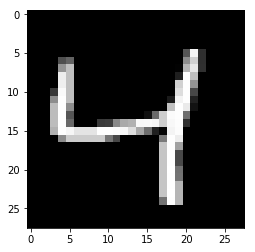

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [22]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=[None, 784])
targets_ = tf.placeholder(tf.float32, shape=[None, 784])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [23]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [24]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6939
Epoch: 1/20... Training loss: 0.6903
Epoch: 1/20... Training loss: 0.6865
Epoch: 1/20... Training loss: 0.6824
Epoch: 1/20... Training loss: 0.6769
Epoch: 1/20... Training loss: 0.6709
Epoch: 1/20... Training loss: 0.6640
Epoch: 1/20... Training loss: 0.6543
Epoch: 1/20... Training loss: 0.6449
Epoch: 1/20... Training loss: 0.6338
Epoch: 1/20... Training loss: 0.6213
Epoch: 1/20... Training loss: 0.6067
Epoch: 1/20... Training loss: 0.5914
Epoch: 1/20... Training loss: 0.5781
Epoch: 1/20... Training loss: 0.5598
Epoch: 1/20... Training loss: 0.5421
Epoch: 1/20... Training loss: 0.5235
Epoch: 1/20... Training loss: 0.5045
Epoch: 1/20... Training loss: 0.4838
Epoch: 1/20... Training loss: 0.4666
Epoch: 1/20... Training loss: 0.4513
Epoch: 1/20... Training loss: 0.4336
Epoch: 1/20... Training loss: 0.4202
Epoch: 1/20... Training loss: 0.4048
Epoch: 1/20... Training loss: 0.3878
Epoch: 1/20... Training loss: 0.3829
Epoch: 1/20... Training loss: 0.3683
E

Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1784
Epoch: 1/20... Training loss: 0.1922
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1822
Epoch: 1/20... Training loss: 0.1798
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1811
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1836
Epoch: 1/20... Training loss: 0.1865
E

Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1605
E

Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1333
E

Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1306
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1215
E

Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1107
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1130
E

Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1050
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1094
E

Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1017
E

Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1013
E

Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1036
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0967
E

Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0931
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0941
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1004
E

Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0958
E

Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.1013
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20... Training loss: 0.0996
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0993
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0995
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0992
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0982
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0985
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0896
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0980
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.1006
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0992
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0895
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0986
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0891
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0878
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0893
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0980
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0994
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0979
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0887
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

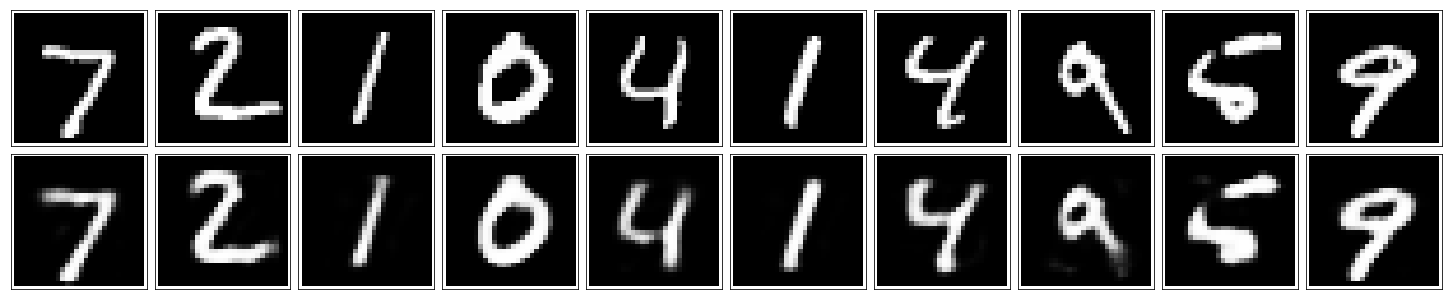

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [26]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.